#LAB AI PROJECT 1

In [3]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [5]:
#Create the dataframe from de CSV file
df=pd.read_csv('pylidc/pylidc_csv.csv')

In [6]:
#In this first section we present some information on the data
df.head(5)


,Unnamed: 0,Nod_id,Patient_id,slice thickness,N nods,Spiculation_Min,Spiculation_Med,Spiculation_Max,Internal_Structure,Calcification,...,Lobulation_max,Texture,Malignancy_min,Malignancy_mean,Malignancy_max,Malignancy_n4,Malignancy_n5,Subtlety_Min,Subtlety_Med,Subtlety_Max
0,1,LIDC-IDRI-0078-1,LIDC-IDRI-0078,3.0,4,1,2.25,4,1,6,...,4,5,3,3.75,5,1,1,4.0,4.50,5.0
1,2,LIDC-IDRI-0078-2,LIDC-IDRI-0078,3.0,4,1,2.25,4,1,6,...,4,4,3,3.75,5,1,1,4.0,4.75,5.0
2,3,LIDC-IDRI-0078-3,LIDC-IDRI-0078,3.0,4,1,1.00,1,1,5,...,1,5,1,1.00,1,0,0,4.0,4.00,4.0
3,4,LIDC-IDRI-0078-4,LIDC-IDRI-0078,3.0,4,1,2.75,4,1,4,...,4,5,3,4.25,5,1,2,5.0,5.00,5.0
4,5,LIDC-IDRI-0069-1,LIDC-IDRI-0069,2.0,3,1,4.00,5,1,6,...,5,5,2,3.25,5,0,1,2.0,2.50,3.0


In [7]:
#The number of nods for each patient is distrubuted according to the following frequency table 
sum=0
print("Number of nods ", "Relative frequency")
for j in range(1,10):
    sum+=df['N nods'].value_counts()[j]/len(df)
    print("       ",j, "         " ,(df['N nods'].value_counts()[j]/len(df)).round(2))
print("   Total:          ",sum.round(2))

Number of nods  Relative frequency
        1           0.11
        2           0.16
        3           0.14
        4           0.11
        5           0.09
        6           0.09
        7           0.06
        8           0.07
        9           0.03
   Total:           0.87


In [8]:
print('Number of patients')
print(df["Patient_id"].nunique())

Number of patients
875


In [9]:
#To better understand the way to classify a nod to be malignant or not we present the related variables 

Axes(0.125,0.11;0.775x0.77)


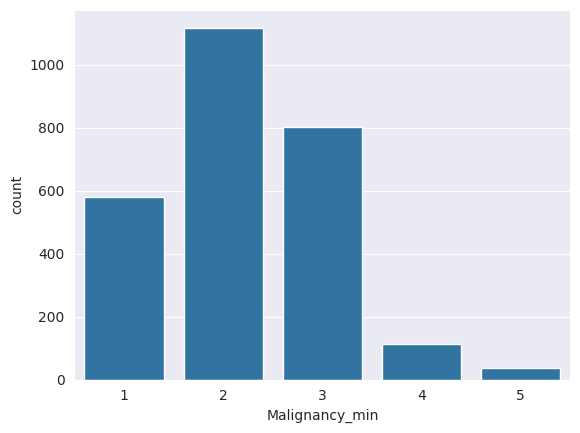

In [10]:
print(sns.countplot(x='Malignancy_min',data=df))

Axes(0.125,0.11;0.775x0.77)


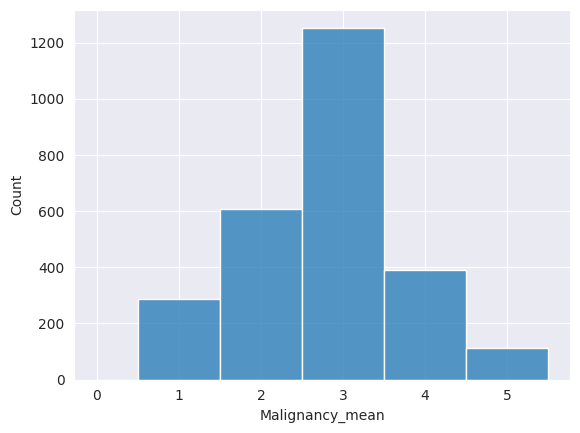

In [11]:
print(sns.histplot(x='Malignancy_mean',data=df,bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

Axes(0.125,0.11;0.775x0.77)


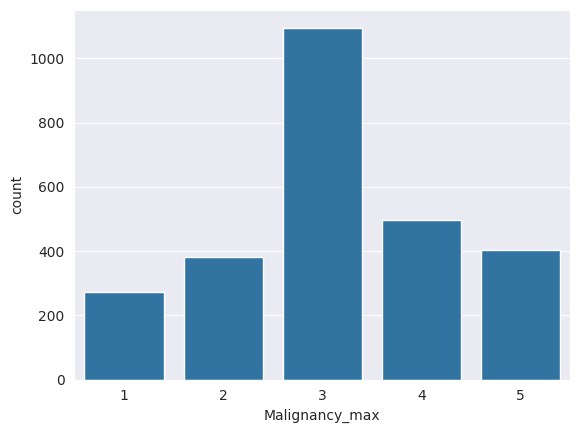

In [12]:
print(sns.countplot(x='Malignancy_max',data=df))

Axes(0.125,0.11;0.775x0.77)


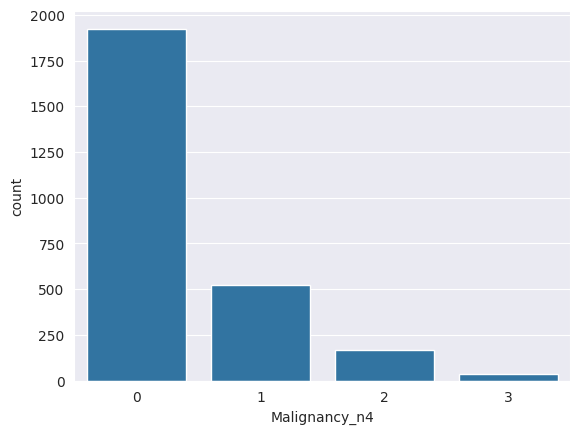

In [13]:
print(sns.countplot(x='Malignancy_n4',data=df))

Axes(0.125,0.11;0.775x0.77)


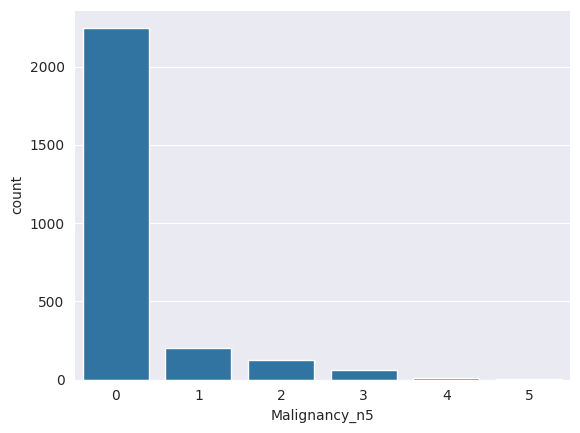

In [14]:
print(sns.countplot(x='Malignancy_n5',data=df))

In [15]:
#Noticing that the distribution of the mean value and the max value is similar we explored it a litle further 
df['dif']=df['Malignancy_max']-df['Malignancy_mean']

Axes(0.125,0.11;0.775x0.77)


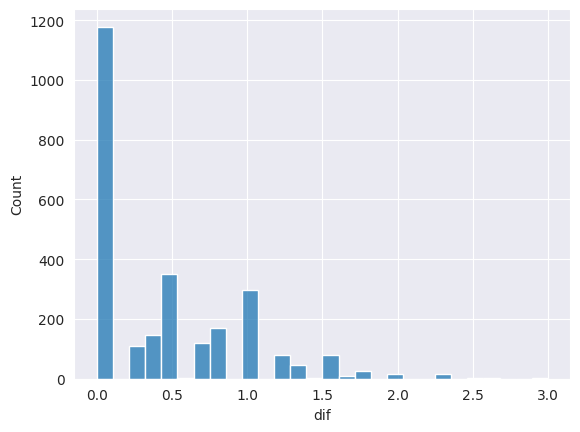

In [16]:
print(sns.histplot(x='dif',data=df))

In [17]:
# Despite the similarities between the mean and the max value we decided to create a joint criterion for the 
# malignancy classification. Therefore a node is considered malignant if there is at least one classification of 5 or
# if the mean value over the classifications is at least 3.5

df["Malignancy"]=np.where((df['Malignancy_mean']>= 3.5)|(df['Malignancy_max']==5), True, False)

In [18]:
df[{'Malignancy_mean','Malignancy_max','Malignancy'}].head(5)

TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [19]:
# Identify the features used to predict the classification of the malignancy of the node
# X - vector of valiables used to predict
# y - target variable

X=df[['N nods','Spiculation_Min', 'Spiculation_Med', 'Spiculation_Max',
       'Internal_Structure', 'Calcification', 'Sphericity', 'Margin_min',
       'Margin_mean', 'Margin_max', 'Lobulation_min', 'Lobulation_mean',
       'Lobulation_max', 'Texture']]
y=df['Malignancy']

In [20]:
# Devide the dataset in train (80%) and test (20%) subsets
# Define a random state do fix this division

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
# Construction of a decision tree classifier with the stop criterion of 
# at least 0.001 of minimum impurity decrease to avoind overfitting

dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
dt = dt.fit(X_train, y_train)

In [22]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation

dt_data = export_graphviz(dt,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
graph = graphviz.Source(dt_data)
display(graph)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [23]:
# test of the decision tree obtained using the test subset
y_predict=dt.predict(X_test)

print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[390,  18],
       [ 78,  45]])

In [24]:
print("Accuracy:")
accuracy_score(y_test, y_predict)

Accuracy:


0.8192090395480226

In [25]:
# Random Forest construction with trees similar to the ones obtained previously
# for different values of hyperparameter - number of features (max_features) 

rf = RandomForestClassifier(max_features=1,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of featrures: ", 1 ," Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_rf=[1]
y_rf=[accuracy]
    
for i in range(2,10):
    rf = RandomForestClassifier(max_features=i,min_impurity_decrease=0.001,n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of featrures: ", i ," Accuracy: ", accuracy)
    x_rf.append(i)
    y_rf.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

#print("Number of featrures: ", best ," Accuracy: ", best_ac)

Best number of features:  6  with accuracy= 0.8549905838041432


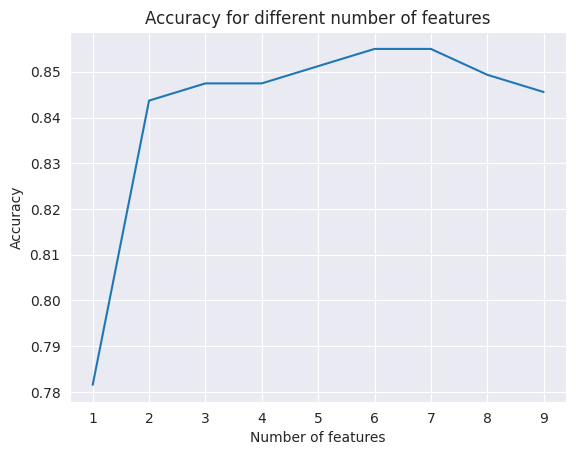

In [26]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_rf,x_rf)
plt.title('Accuracy for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of features: ", best ," with accuracy=", best_ac)

In [27]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation
# for the two first trees

rf = RandomForestClassifier(max_features=best,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)

for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

#KNN


In [28]:
# Knn construction for different values of hyperparameter - number of neighbors (n_neighbors) 


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of neighbors: ","1", "Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_knn=[1]
y_knn=[accuracy]

for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of neighbors: ",i, "Accuracy: ", accuracy)
    x_knn.append(i)
    y_knn.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

Best number of neighbors:  8  with accuracy= 0.8418079096045198


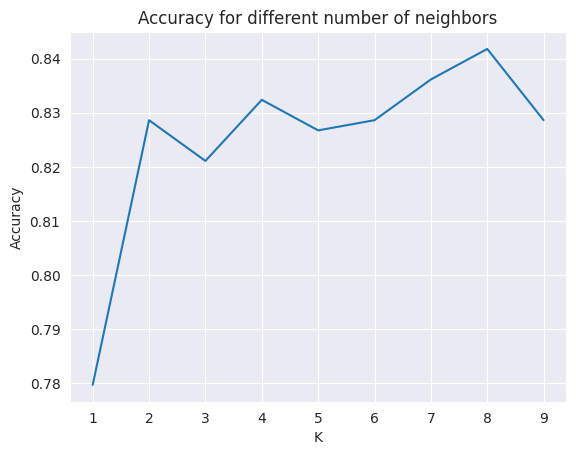

In [29]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_knn,x_knn)
plt.title('Accuracy for different number of neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of neighbors: ", best ," with accuracy=", best_ac)

fjjfkgjfkdjlhdhljgfklh

In [ ]:
import pylidc as pl
import numpy as np
import pandas as pd
import os
import shutil
import time

Code for feature extraction using pyradiomics and dependencies: dcm2niix and SimpleITK. We built docker container to run the code inside:

In [1]:
#Function that calculates features using the pyradiomics-dcm.py script from the oyradiomics GIT
def get_features():
    start_time = time.time()
    # put path of dataset here
    parent_dir = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\Images+seg\manifest-1698154951594"
    patient_dicom_path_mounted = r"/data/Images+seg/manifest-1698154951594/LIDC-IDRI"
    # get path of LIDC-IDRI directionary
    data_dir = os.path.join(parent_dir, "LIDC-IDRI")
    # give directory where docker saves files
    docker_save_dir = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD"
    # give the hash of the pyradiomnics docker
    docker_hash = r"d95ce08239e3182d8631d3492a5e4a32096d28285c3d2f10dd570d7e6d06fd01"
    # path to the features dict
    features_dict = r"/data/test/featuresDict_IBSIv7.tsv"
    # pyradiomics save folder
    pyradiomics_midsave_path = r"/data/pyradiomics converter test"
    # temporal dir
    temp_dir = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\temp file"
    parameter_file = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\Pyradiomics_Params_test.yaml"
    data = pd.read_csv(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\features.csv")
    df = pd.read_excel(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\nodule_counts_by_patient.xlsx")
    df = df.drop(df.columns[[4, 5]], axis=1)
    df.columns = ['Patient_ID', 'Total_Nodule_Count', 'NodG3','NodL3']
    dataframe = pd.DataFrame(
        columns=['Patient_ID', 'Nodule', ' Annotation', 'Subtlety', 'InternalStructure', 'Calcification', 'Sphericity',
                 'Margin', 'Lobulation', 'Spiculation', 'Texture', 'Malignancy'])
    backup = 0
    iteration_counter = 1
    for p_id in df['Patient_ID']:

        print("Patient " + str(p_id) + "Processing")
        if os.path.isdir(os.path.join(data_dir, str(p_id))) == False:
            print("Patient " + str(p_id) + " not found")
            continue  # if the patient folder doesn't exist, skip it

        scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == p_id).first()
        nods = scan.cluster_annotations()

        # path to the patient folder
        patient_dir = os.path.join(data_dir, str(p_id))
        # path to dicom ct-scans of patient
        patient_dicom_path = scan.get_path_to_dicom_files()

        patient_folders = os.path.join(patient_dir, os.listdir(patient_dir)[0])
        if len(os.listdir(patient_folders))==1:
            shutil.rmtree(os.path.join(patient_dir, os.listdir(patient_dir)[0]))
            patient_folders = os.path.join(patient_dir, os.listdir(patient_dir)[0])
            print("wrong folder removed!")

        # listing all the folders from a patient
        patient_seg_folders = os.listdir(patient_folders)
        for folder in patient_seg_folders:
            if "evaluations" in folder:
                shutil.rmtree(os.path.join(patient_folders,folder))
        patient_seg_folders = os.listdir(patient_folders)
        # saving the dicom images folder path
        # get all seg folders for nodules later


        #if scan is None: # if the scan is not available we continue
        #    continue

        nod = 1
        annot = 0
        for nodule in nods:
            for ann in nodule:
                if annot >= len(patient_seg_folders):
                    continue
                backup += 1 #backupcounter

                iteration_counter += 1
                seg_folder = os.path.join(patient_folders, patient_seg_folders[annot+1])

                # check how many files are in the segmentation folder
                seg_files = os.listdir(seg_folder)
                if len(seg_files) <= 0:
                    # add a row with NaN values to the dataframe
                    data.loc[len(data)] = [None] * len(data.columns)
                # iterating over each segmentation file
                for file in os.listdir(seg_folder):
                    if file.endswith(".dcm"):
                        seg_file_path = os.path.join(seg_folder, file)
                        print("docker run -v \"" + docker_save_dir + ":/data\" " + docker_hash + " --input-image-dir \"/data/" + os.path.relpath(patient_dicom_path, docker_save_dir).replace(chr(92),"/") +  "\" --input-seg-file \"/data/" + os.path.relpath(seg_file_path, docker_save_dir).replace(chr(92),"/") + "\" --output-dir \"" + pyradiomics_midsave_path + "\" --volume-reconstructor dcm2niix --features-dict \"/data/" + os.path.relpath(features_dict, docker_save_dir).replace(chr(92),"/") + "\" --temp-dir \"/data/" + os.path.relpath(temp_dir, docker_save_dir).replace(chr(92),"/") + "\" --correct-mask --parameters \"/data/" + os.path.relpath(parameter_file, docker_save_dir).replace(chr(92),"/") + "\"")
                        os.system("docker run -v \"" + docker_save_dir + ":/data\" " + docker_hash + " --input-image-dir \"/data/" + os.path.relpath(patient_dicom_path, docker_save_dir).replace(chr(92),"/") +  "\" --input-seg-file \"/data/" + os.path.relpath(seg_file_path, docker_save_dir).replace(chr(92),"/") + "\" --output-dir \"" + pyradiomics_midsave_path + "\" --volume-reconstructor dcm2niix --features-dict \"/data/" + os.path.relpath(features_dict, docker_save_dir).replace(chr(92),"/") + "\" --temp-dir \"/data/" + os.path.relpath(temp_dir, docker_save_dir).replace(chr(92),"/") + "\" --correct-mask --parameters \"/data/" + os.path.relpath(parameter_file, docker_save_dir).replace(chr(92),"/") + "\"")

                        try:
                            testdata = pd.read_csv(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\temp file\Features\1.csv")
                            #print(testdata)
                            # append data to features.csv
                            #print(data.info())
                            #data = data.append(testdata)
                            data = pd.concat([data, testdata], ignore_index=True)
                            #print(data)


                        except:
                            # append a row with NaN values to the dataframe
                            data.loc[len(data)] = [None] * len(data.columns)
                            thisdir = os.getcwd()
                            os.chdir(parent_dir)
                            # write to a log file the patient name, the seg folder name and the file name
                            log = open("log.txt", "a")
                            log.write("Failed to extract features from: " + os.getcwd() + "\n")
                            log.write("SEG File: " + file + "\n\n")
                            os.chdir(thisdir)
                            continue
                        # delete temp folder
                        os.system("rmdir /s /q temp")
                        print("\n\n")
                    else:
                        # also append a row with NaN values to the dataframe
                        data.loc[len(data)] = [None] * len(data.columns)

                # create feature vector
                feature = list(ann.feature_vals())
                feature.insert(0, annot)
                feature.insert(0, nod)
                feature.insert(0, p_id)
                dataframe.loc[len(dataframe)] = feature

                thisdir = os.getcwd()

                # create a backup of the dataframes every 10 iterations (every 5 annotations)
                if backup % 10 == 0:
                    current_time = time.time()
                    runtime = (current_time - start_time)/60
                    print('Iteration: ' + str(iteration_counter) + '-----Backup create------------time:' + str(runtime))
                    os.chdir(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\Backups")

                    data.to_csv("pyradiomicsBackup.csv", index=False)
                    dataframe.to_csv("pylidcBackup.csv", index=False)

                    df1 = pd.read_csv("pylidcBackup.csv")
                    df2 = pd.read_csv("pyradiomicsBackup.csv")

                    df3 = pd.concat([df1, df2], axis=1)
                    df3.to_csv("total_data_obliterationBackup.csv", index=False)
                os.chdir(thisdir)

                annot += 1
            nod += 1
    os.chdir(parent_dir)

    dataframe.to_csv("pylidc.csv", index=False)
    data.to_csv("pyradiomics.csv", index=False)

    df1 = pd.read_csv("pylidc.csv")
    df2 = pd.read_csv("pyradiomics.csv")

    # concatenate the columns from both dataframes
    df3 = pd.concat([df1, df2], axis=1)

    df3.to_csv("total_data_obliteration.csv", index=False)

#get_features()

NameError: name 'time' is not defined

Code for feature selection:

In [ ]:
#-loading data-> backup of 29/10/2023
#pyradiomics data
pr_data = pd.read_csv("../Unsorted/Data files/CSV DATA FILES/backup 29_10/pyradiomicsBackup.csv")

#pylidc data
pl_data = pd.read_csv("../Unsorted/Data files/CSV DATA FILES/backup 29_10/pylidcBackup.csv")

#total obliteration data
df = pd.read_csv("../Unsorted/Data files/CSV DATA FILES/backup 29_10/total_data_obliterationBackup.csv")

def drop_columns(df):
    #function for ropping columns manually
    columns_to_drop = np.arange(0,10)
    # columns_to_drop2 = np.arange(12,30)
    # columns_to_drop = np.append(columns_to_drop,  columns_to_drop2)
    columns_to_drop = np.append(columns_to_drop,  [11,12,13])
    df.drop(columns=df.columns[columns_to_drop],inplace=True)
    return df
def cleaning_data(df):
    df = df.drop(df[df['Malignancy'] == 3].index)
    # Remove rows with NaN values in the "Malignancy" column
    df.dropna(subset=["Malignancy"], inplace=True)
    return df

def normalize_data(df):
    normalized_data = (df-df.min())/(df.max()-df.min())
    return normalized_data

def create_category_column(df):
    # Create a new "Category" column based on the "Malignancy" values
    df["Category"] = df["Malignancy"].apply(lambda x: 1 if x in [4, 5] else 0)
    # drop all categories which are not numerical
    df = df.select_dtypes(include=[int, float])
    return df

def get_malignancy_column_dtype(df):
    # Check if the "Malignancy" column exists in the DataFrame
    if "Malignancy" in df.columns:
        malignancy_dtype = df["Malignancy"].dtype
        return malignancy_dtype
    else:
        return "Column 'Malignancy' not found in the DataFrame."


df = cleaning_data(df)
get_malignancy_column_dtype(df)
df = create_category_column(df)
df_norm = normalize_data(df)
#df_norm_form = drop_columns(df_norm)
print(df["Malignancy"])
print(df["Category"])
print(df_norm)

#getting rid of features with low variance
#sel = VarianceThreshold(threshold=0)
#sel.fit_transform(tot_data)
#print(tot_data)

df_norm.to_csv(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\backup 29_10\filewip.csv", index=False)